# 연습문제 7번

## First In First Out  ( FIFO ) ,  None recursive

## ID3 Decision Tree ,  MaxDepth

### data load 2.0 set

In [5]:
import sklearn
import numpy as np
import pandas as pd
from pathlib import Path

data_dir = Path('./data/chapter4_dataset.csv')
df = pd.read_csv(data_dir)

In [6]:
df = df.drop(['Idx', 'density', 'sugar_ratio'], axis=1)

In [7]:
df

,color,root,knocks,texture,navel,touch,label
0,dark_green,curl_up,little_heavily,distinct,sinking,hard_smooth,1
1,black,curl_up,heavily,distinct,sinking,hard_smooth,1
2,black,curl_up,little_heavily,distinct,sinking,hard_smooth,1
3,dark_green,curl_up,heavily,distinct,sinking,hard_smooth,1
4,light_white,curl_up,little_heavily,distinct,sinking,hard_smooth,1
5,dark_green,little_curl_up,little_heavily,distinct,little_sinking,soft_stick,1
6,black,little_curl_up,little_heavily,little_blur,little_sinking,soft_stick,1
7,black,little_curl_up,little_heavily,distinct,little_sinking,hard_smooth,1
8,black,little_curl_up,heavily,little_blur,little_sinking,hard_smooth,0
9,dark_green,stiff,clear,distinct,even,soft_stick,0


In [15]:
import math
import copy

class Node:
    def __init__(self, parent_val=None):
        self.feature_name = None
        self.parent_val = parent_val
        
        self.feature_val_lst = []
        self.child_node_lst = []
        
        self.label = None

In [78]:
def AllEqual(D, A):
    for att in A:
        if len(D[att].unique()) > 1:
            return False
    return True

def Entropy(D):
    ent = 0
    length = len(D)
    
    for count in D['label'].value_counts():
        p = count / length
        ent -= p * math.log(p, 2)
    return ent

def Gain(D, a):
    gain = Entropy(D)
    length = len(D)
    
    for att_val in D[a].unique():
        D_v = D[D[a] == att_val]
        gain -= Entropy(D_v) * len(D_v) / length
    
    return gain
        
def BestAtt(D, A):   
    gain_lst = [] # (gain, attribute, t(연속속성만))
    
    for att in A:
        gain = Gain(D, att)
        gain_lst += [(gain, att)]
            
    return max(gain_lst, key=lambda x: x[0])
    

def TreeGenerate(D, A, max_depth):  # D: data, A: 속성  A_type: set 
    root = Node()
    node_lst = [(root, D, A, 1)]   # (node, D, A, level)
    
    while node_lst:
        node_tuple = node_lst.pop(0)
        node, _D, _A, level = node_tuple
        
        node.label = _D['label'].value_counts().idxmax()

        if len(_D['label'].unique()) == 1 or AllEqual(_D, _A):
            continue
        
        _, best_att = BestAtt(_D, _A)
        node.feature_name = best_att
        
        for att_val in _D[best_att].unique():
            _D_v = _D[_D[best_att] == att_val]
            node.feature_val_lst += [att_val]
            
            child_node = Node(parent_val=att_val)
            
            if level == max_depth:
                continue
            
            node.child_node_lst += [child_node]
            node_lst.append((child_node, _D_v, _A - {best_att}, level + 1))
    
    return root

In [66]:
root = TreeGenerate(df, set(df.columns) - {'label'}, max_depth=10)

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

def _node_label(node):
    label = "{}\n{}\n{}".format(node.parent_val, node.feature_name, node.label)
    return label
    
def _add_node(node, parent_node_label, g):
    node_label = _node_label(node)
    g.add_node(node_label)
    g.add_edge(parent_node_label, node_label)

    for child_node in node.child_node_lst:
        _add_node(child_node, node_label, g)

def visualize(root, figsize=(15, 10), node_size=10000):
    g = nx.DiGraph()
    node = root
    node_label = _node_label(node)

    g.add_node(node_label)

    for child_node in node.child_node_lst:
        _add_node(child_node, node_label, g)

    pos = graphviz_layout(g, prog='dot')
    plt.figure(figsize=figsize)
    nx.draw(g, pos=pos, with_labels=True, node_shape='s', node_color='white', 
           node_size=node_size)
    plt.show()

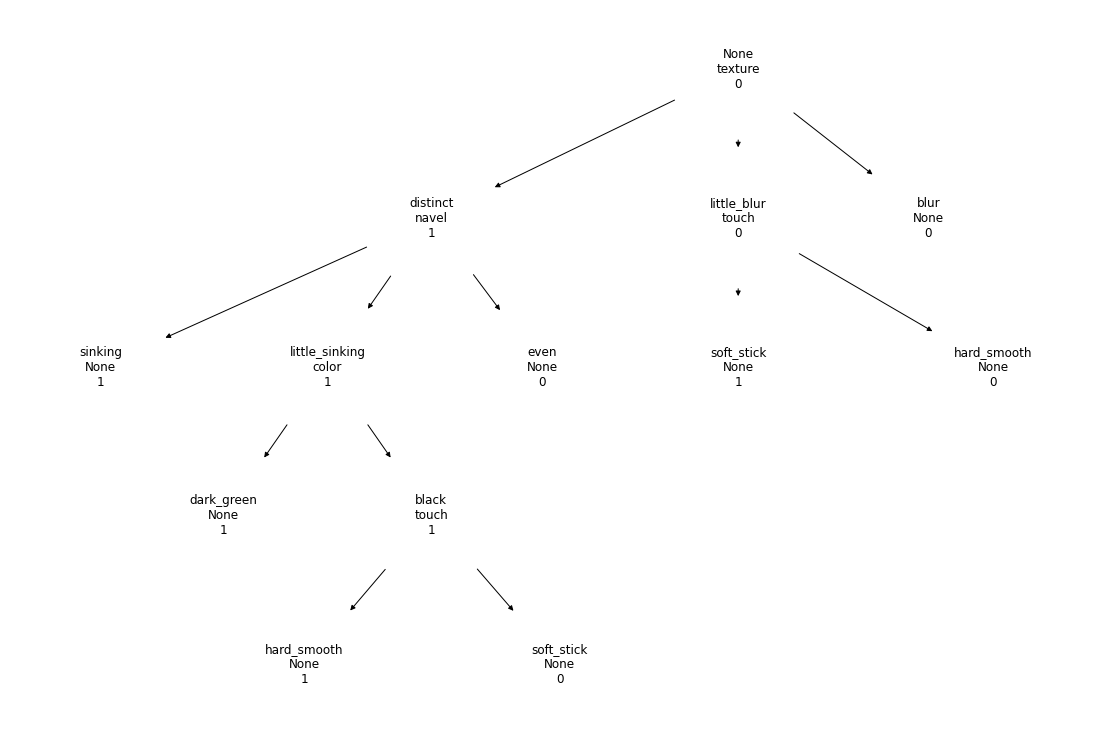

In [73]:
visualize(root)

### max depth

In [84]:
root = TreeGenerate(df, set(df.columns) - {'label'}, max_depth=3)

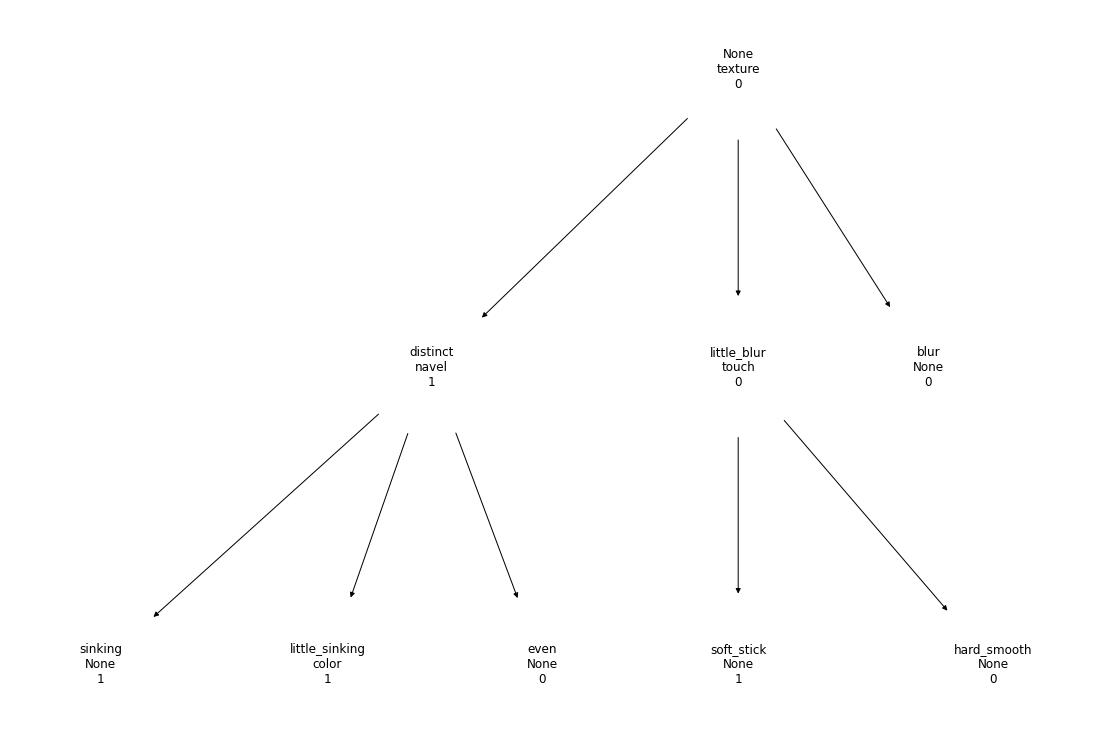

In [85]:
visualize(root)